In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pathlib import Path 

import os


import random 

import matplotlib.pyplot as plt
import seaborn as sns

# classification metric
from scipy.stats import spearmanr


In [16]:
model_type = 'roberta'
pretrained_model_name = 'roberta-base' # 'roberta-base-openai-detector'
DATA_ROOT = Path("../input/google-quest-challenge/")
MODEL_ROOT = Path("../input/"+pretrained_model_name)
train = pd.read_csv(DATA_ROOT / 'train.csv')
test = pd.read_csv(DATA_ROOT / 'test.csv')
sample_sub = pd.read_csv(DATA_ROOT / 'sample_submission.csv')
real_sub = pd.read_csv(Path("~/Downloads/submission.csv"))
print(train.shape,test.shape)
download_model=False

(6079, 41) (476, 11)


In [5]:
train.head()

,qa_id,question_title,question_body,question_user_name,question_user_page,answer,answer_user_name,answer_user_page,url,category,...,question_well_written,answer_helpful,answer_level_of_information,answer_plausible,answer_relevance,answer_satisfaction,answer_type_instructions,answer_type_procedure,answer_type_reason_explanation,answer_well_written
0,0,What am I losing when using extension tubes in...,After playing around with macro photography on...,ysap,https://photo.stackexchange.com/users/1024,"I just got extension tubes, so here's the skin...",rfusca,https://photo.stackexchange.com/users/1917,http://photo.stackexchange.com/questions/9169/...,LIFE_ARTS,...,1.000000,1.000000,0.666667,1.000000,1.000000,0.800000,1.0,0.000000,0.000000,1.000000
1,1,What is the distinction between a city and a s...,I am trying to understand what kinds of places...,russellpierce,https://rpg.stackexchange.com/users/8774,It might be helpful to look into the definitio...,Erik Schmidt,https://rpg.stackexchange.com/users/1871,http://rpg.stackexchange.com/questions/47820/w...,CULTURE,...,0.888889,0.888889,0.555556,0.888889,0.888889,0.666667,0.0,0.000000,0.666667,0.888889
2,2,Maximum protusion length for through-hole comp...,I'm working on a PCB that has through-hole com...,Joe Baker,https://electronics.stackexchange.com/users/10157,Do you even need grooves? We make several pro...,Dwayne Reid,https://electronics.stackexchange.com/users/64754,http://electronics.stackexchange.com/questions...,SCIENCE,...,0.777778,0.777778,0.555556,1.000000,1.000000,0.666667,0.0,0.333333,1.000000,0.888889
3,3,Can an affidavit be used in Beit Din?,"An affidavit, from what i understand, is basic...",Scimonster,https://judaism.stackexchange.com/users/5151,"Sending an ""affidavit"" it is a dispute between...",Y e z,https://judaism.stackexchange.com/users/4794,http://judaism.stackexchange.com/questions/551...,CULTURE,...,0.888889,0.833333,0.333333,0.833333,1.000000,0.800000,0.0,0.000000,1.000000,1.000000
4,5,How do you make a binary image in Photoshop?,I am trying to make a binary image. I want mor...,leigero,https://graphicdesign.stackexchange.com/users/...,Check out Image Trace in Adobe Illustrator. \n...,q2ra,https://graphicdesign.stackexchange.com/users/...,http://graphicdesign.stackexchange.com/questio...,LIFE_ARTS,...,1.000000,1.000000,0.666667,1.000000,1.000000,0.800000,1.0,0.000000,1.000000,1.000000


(array([ 131.,  307.,   33.,  539.,  839., 1111.,  163., 1337., 1619.]),
 array([0.33333333, 0.40740741, 0.48148148, 0.55555556, 0.62962963,
        0.7037037 , 0.77777778, 0.85185185, 0.92592593, 1.        ]),
 <a list of 9 Patch objects>)

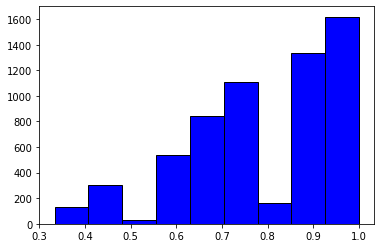

In [7]:
# matplotlib histogram
plt.hist(train['question_well_written'], color = 'blue', edgecolor = 'black',
         bins = int(180/20))

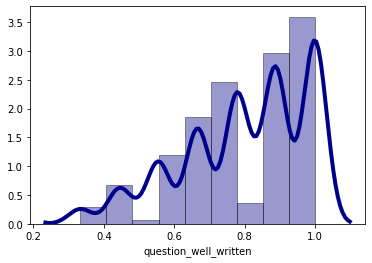

In [9]:
# Density Plot and Histogram of all arrival delays
sns.distplot(train['question_well_written'], hist=True, kde=True, 
             bins=int(180/20), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

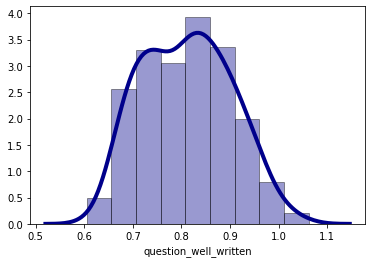

In [104]:
# Density Plot and Histogram of all arrival delays
sns.distplot(real_sub['question_well_written'], hist=True, kde=True, 
             bins=int(180/20), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

In [11]:
train['question_well_written'].unique()

array([1.        , 0.88888889, 0.77777778, 0.83333333, 0.66666667,
       0.33333333, 0.55555556, 0.44444444, 0.5       ])

In [12]:
labels = list(sample_sub.columns[1:].values)

In [17]:
for label in labels:
    print(train[label].value_counts(normalize=True))
    print()

1.000000    0.466031
0.888889    0.259747
0.777778    0.145254
0.666667    0.082744
0.833333    0.017766
0.333333    0.011186
0.555556    0.009870
0.500000    0.005429
0.444444    0.001974
Name: question_asker_intent_understanding, dtype: float64

0.333333    0.247738
0.555556    0.153315
0.444444    0.146899
0.666667    0.139003
0.777778    0.115315
1.000000    0.095904
0.888889    0.077315
0.500000    0.015463
0.833333    0.009048
Name: question_body_critical, dtype: float64

0.000000    0.889785
0.333333    0.063168
0.666667    0.025004
1.000000    0.017108
0.500000    0.004935
Name: question_conversational, dtype: float64

1.000000    0.482974
0.666667    0.225860
0.000000    0.132588
0.333333    0.085869
0.500000    0.072709
Name: question_expect_short_answer, dtype: float64

1.000000    0.572463
0.666667    0.218128
0.333333    0.144267
0.000000    0.051818
0.500000    0.013325
Name: question_fact_seeking, dtype: float64

1.000000    0.669683
0.666667    0.130614
0.000000    0.10

In [18]:
for label in labels:
    print(real_sub[label].value_counts(normalize=True))
    print()

0.886719    0.014706
0.916016    0.010504
0.930176    0.010504
0.873535    0.010504
0.876465    0.010504
              ...   
0.901855    0.002101
0.817871    0.002101
0.885254    0.002101
1.006836    0.002101
1.000977    0.002101
Name: question_asker_intent_understanding, Length: 274, dtype: float64

0.505371    0.008403
0.501465    0.008403
0.689941    0.006303
0.725586    0.006303
0.744629    0.006303
              ...   
0.809570    0.002101
0.499023    0.002101
0.399414    0.002101
0.442871    0.002101
0.637207    0.002101
Name: question_body_critical, Length: 394, dtype: float64

0.012550    0.004202
0.023849    0.004202
0.164917    0.004202
0.139526    0.004202
0.225586    0.004202
              ...   
0.001127    0.002101
0.277832    0.002101
0.055634    0.002101
0.201904    0.002101
0.022583    0.002101
Name: question_conversational, Length: 462, dtype: float64

0.755859    0.008403
0.717285    0.008403
0.754395    0.008403
0.791016    0.008403
0.566895    0.006303
           

In [55]:
import pdb
from bisect import bisect

In [71]:
def make_intervals(train_df,labels):
    boundaries ={}
    unique_values={}
    for label in labels:
        unique_values[label] =np.sort( train_df[label].unique())
        boundaries[label] = [(unique_values[label][i+1]+unique_values[label][i])/2  for i in range(len(unique_values[label])-1)]
    return unique_values,boundaries
        

In [72]:
unique_values,boundaries=make_intervals(train,labels)

In [65]:
train["question_asker_intent_understanding"][2],boundaries["question_asker_intent_understanding"]

(0.8888888888888888,
 [0.38888888888888884,
  0.4722222222222222,
  0.5277777777777778,
  0.6111111111111112,
  0.7222222222222222,
  0.8055555555555556,
  0.8611111111111112,
  0.9444444444444444])

In [68]:
real_sub["question_asker_intent_understanding"][2]

0.916015625

In [95]:
def return_categorical_value(df_column,col_unique_values,col_boundaries):
    #pdb.set_trace()
    return df_column.apply(lambda row: col_unique_values[bisect(col_boundaries,df_column[1])])


In [96]:
real_sub2=real_sub.copy()
real_sub2.head()

,qa_id,question_asker_intent_understanding,question_body_critical,question_conversational,question_expect_short_answer,question_fact_seeking,question_has_commonly_accepted_answer,question_interestingness_others,question_interestingness_self,question_multi_intent,...,question_well_written,answer_helpful,answer_level_of_information,answer_plausible,answer_relevance,answer_satisfaction,answer_type_instructions,answer_type_procedure,answer_type_reason_explanation,answer_well_written
0,39,1.000977,0.637207,0.292725,0.572754,0.588867,0.546387,0.712891,0.692383,0.642090,...,0.973145,0.970215,0.677246,1.055664,1.022461,0.883301,0.170776,0.050903,0.669434,0.986328
1,46,0.878418,0.473389,0.013390,0.750488,0.794434,0.933105,0.545410,0.460449,0.366211,...,0.680176,0.937500,0.616211,0.979004,0.973145,0.839844,0.878906,0.149902,0.035828,0.875977
2,70,0.916016,0.712891,0.042542,0.774902,0.860352,0.936523,0.622070,0.514160,0.124756,...,0.879395,0.935547,0.657227,0.968262,0.950195,0.871094,0.199951,0.083618,0.713379,0.927734
3,132,0.916992,0.463867,0.005104,0.716797,0.806152,0.901855,0.556641,0.427246,0.051147,...,0.757324,0.972168,0.648438,1.001953,1.017578,0.871094,0.870605,0.145630,0.378174,0.929688
4,200,0.928711,0.445068,0.085388,0.764160,0.708008,0.799805,0.685059,0.666504,0.256104,...,0.702148,0.941406,0.672363,0.998047,0.999512,0.861816,0.380615,0.174194,0.490479,0.925781


In [97]:
for label in labels:
    real_sub2[label]=return_categorical_value(real_sub[label],unique_values[label],boundaries[label])

In [103]:
real_sub.head(20)

,qa_id,question_asker_intent_understanding,question_body_critical,question_conversational,question_expect_short_answer,question_fact_seeking,question_has_commonly_accepted_answer,question_interestingness_others,question_interestingness_self,question_multi_intent,...,question_well_written,answer_helpful,answer_level_of_information,answer_plausible,answer_relevance,answer_satisfaction,answer_type_instructions,answer_type_procedure,answer_type_reason_explanation,answer_well_written
0,39,1.000977,0.637207,0.292725,0.572754,0.588867,0.546387,0.712891,0.692383,0.642090,...,0.973145,0.970215,0.677246,1.055664,1.022461,0.883301,0.170776,0.050903,0.669434,0.986328
1,46,0.878418,0.473389,0.013390,0.750488,0.794434,0.933105,0.545410,0.460449,0.366211,...,0.680176,0.937500,0.616211,0.979004,0.973145,0.839844,0.878906,0.149902,0.035828,0.875977
2,70,0.916016,0.712891,0.042542,0.774902,0.860352,0.936523,0.622070,0.514160,0.124756,...,0.879395,0.935547,0.657227,0.968262,0.950195,0.871094,0.199951,0.083618,0.713379,0.927734
3,132,0.916992,0.463867,0.005104,0.716797,0.806152,0.901855,0.556641,0.427246,0.051147,...,0.757324,0.972168,0.648438,1.001953,1.017578,0.871094,0.870605,0.145630,0.378174,0.929688
4,200,0.928711,0.445068,0.085388,0.764160,0.708008,0.799805,0.685059,0.666504,0.256104,...,0.702148,0.941406,0.672363,0.998047,0.999512,0.861816,0.380615,0.174194,0.490479,0.925781
5,245,0.994141,0.904785,0.075623,0.590332,1.002930,0.876953,0.696777,0.618164,0.278076,...,1.024414,0.962891,0.638184,0.999512,1.002930,0.898926,0.048737,0.177002,0.797363,0.958984
6,257,0.873535,0.512695,0.021896,0.755859,0.711426,0.891602,0.544922,0.433350,0.032623,...,0.699219,0.981934,0.709961,0.988281,0.998047,0.911133,0.840332,0.164795,0.420898,0.919922
7,267,0.974121,0.821289,0.233032,0.790527,0.791016,0.788086,0.658203,0.677734,0.059631,...,0.914062,0.931641,0.695312,0.991211,1.006836,0.874512,-0.000153,-0.043701,0.994141,0.918945
8,284,0.879395,0.521973,-0.006840,0.800781,0.723633,0.908203,0.541504,0.440674,0.195679,...,0.766113,0.949219,0.667480,0.974121,0.986816,0.867676,0.831055,0.164062,0.292236,0.894531
9,292,0.974121,0.685059,0.022125,0.853027,0.888672,0.934570,0.695801,0.629883,0.186646,...,0.864258,0.983398,0.700684,0.999023,1.015625,0.901855,0.547363,0.124451,0.772461,0.939941


In [98]:
real_sub2

,qa_id,question_asker_intent_understanding,question_body_critical,question_conversational,question_expect_short_answer,question_fact_seeking,question_has_commonly_accepted_answer,question_interestingness_others,question_interestingness_self,question_multi_intent,...,question_well_written,answer_helpful,answer_level_of_information,answer_plausible,answer_relevance,answer_satisfaction,answer_type_instructions,answer_type_procedure,answer_type_reason_explanation,answer_well_written
0,39,0.888889,0.5,0.0,0.666667,0.666667,1.0,0.555556,0.444444,0.333333,...,0.666667,0.888889,0.666667,1.0,1.0,0.866667,1.0,0.0,0.0,0.888889
1,46,0.888889,0.5,0.0,0.666667,0.666667,1.0,0.555556,0.444444,0.333333,...,0.666667,0.888889,0.666667,1.0,1.0,0.866667,1.0,0.0,0.0,0.888889
2,70,0.888889,0.5,0.0,0.666667,0.666667,1.0,0.555556,0.444444,0.333333,...,0.666667,0.888889,0.666667,1.0,1.0,0.866667,1.0,0.0,0.0,0.888889
3,132,0.888889,0.5,0.0,0.666667,0.666667,1.0,0.555556,0.444444,0.333333,...,0.666667,0.888889,0.666667,1.0,1.0,0.866667,1.0,0.0,0.0,0.888889
4,200,0.888889,0.5,0.0,0.666667,0.666667,1.0,0.555556,0.444444,0.333333,...,0.666667,0.888889,0.666667,1.0,1.0,0.866667,1.0,0.0,0.0,0.888889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471,9569,0.888889,0.5,0.0,0.666667,0.666667,1.0,0.555556,0.444444,0.333333,...,0.666667,0.888889,0.666667,1.0,1.0,0.866667,1.0,0.0,0.0,0.888889
472,9590,0.888889,0.5,0.0,0.666667,0.666667,1.0,0.555556,0.444444,0.333333,...,0.666667,0.888889,0.666667,1.0,1.0,0.866667,1.0,0.0,0.0,0.888889
473,9597,0.888889,0.5,0.0,0.666667,0.666667,1.0,0.555556,0.444444,0.333333,...,0.666667,0.888889,0.666667,1.0,1.0,0.866667,1.0,0.0,0.0,0.888889
474,9623,0.888889,0.5,0.0,0.666667,0.666667,1.0,0.555556,0.444444,0.333333,...,0.666667,0.888889,0.666667,1.0,1.0,0.866667,1.0,0.0,0.0,0.888889


In [99]:
for label in labels:
    print(train[label].value_counts(normalize=True))
    print()

1.000000    0.466031
0.888889    0.259747
0.777778    0.145254
0.666667    0.082744
0.833333    0.017766
0.333333    0.011186
0.555556    0.009870
0.500000    0.005429
0.444444    0.001974
Name: question_asker_intent_understanding, dtype: float64

0.333333    0.247738
0.555556    0.153315
0.444444    0.146899
0.666667    0.139003
0.777778    0.115315
1.000000    0.095904
0.888889    0.077315
0.500000    0.015463
0.833333    0.009048
Name: question_body_critical, dtype: float64

0.000000    0.889785
0.333333    0.063168
0.666667    0.025004
1.000000    0.017108
0.500000    0.004935
Name: question_conversational, dtype: float64

1.000000    0.482974
0.666667    0.225860
0.000000    0.132588
0.333333    0.085869
0.500000    0.072709
Name: question_expect_short_answer, dtype: float64

1.000000    0.572463
0.666667    0.218128
0.333333    0.144267
0.000000    0.051818
0.500000    0.013325
Name: question_fact_seeking, dtype: float64

1.000000    0.669683
0.666667    0.130614
0.000000    0.10

In [105]:
for label in labels:
    print(real_sub2[label].value_counts(normalize=True))

0.888889    1.0
Name: question_asker_intent_understanding, dtype: float64
0.5    1.0
Name: question_body_critical, dtype: float64
0.0    1.0
Name: question_conversational, dtype: float64
0.666667    1.0
Name: question_expect_short_answer, dtype: float64
0.666667    1.0
Name: question_fact_seeking, dtype: float64
1.0    1.0
Name: question_has_commonly_accepted_answer, dtype: float64
0.555556    1.0
Name: question_interestingness_others, dtype: float64
0.444444    1.0
Name: question_interestingness_self, dtype: float64
0.333333    1.0
Name: question_multi_intent, dtype: float64
0.0    1.0
Name: question_not_really_a_question, dtype: float64
0.5    1.0
Name: question_opinion_seeking, dtype: float64
0.5    1.0
Name: question_type_choice, dtype: float64
0.0    1.0
Name: question_type_compare, dtype: float64
0.0    1.0
Name: question_type_consequence, dtype: float64
0.0    1.0
Name: question_type_definition, dtype: float64
0.0    1.0
Name: question_type_entity, dtype: float64
1.0    1.0
Name

In [ ]:
def categorical_adjust(df_column):
    for  in labels

In [ ]:
train[[labels]]
real_sub[label].apply()